In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install scikit-learn==1.0

     |████████████████████████████████| 23.1 MB 6.1 MB/s eta 0:00:01     |███████████████████████         | 16.7 MB 6.1 MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import sklearn
sklearn.__version__

'1.0'

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate 
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, auc, make_scorer, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
df_fullX = pd.read_csv("mean_FA_47tracts_51subjects.csv",index_col=0)
df_fullX

,496,2236,384,1833,869,3159,1062,3028,2844,388,...,1133,3320,3214,1386,3508,3318,2417,3468,2827,3283
anterioFrontalCC,0.632962,0.568857,0.626708,0.586930,0.647476,0.558272,0.611070,0.613666,0.596724,0.592404,...,0.618450,0.522183,0.572471,0.593135,0.564249,0.558280,0.578814,0.560978,0.575504,0.605542
forcepsMajor,0.737866,0.703005,0.726527,0.649913,0.727517,0.670481,0.731945,0.712419,0.668552,0.745050,...,0.729845,0.706121,0.713530,0.743247,0.682015,0.646550,0.679819,0.640497,0.710944,0.742961
forcepsMinor,0.634883,0.568031,0.614243,0.594077,0.637367,0.525520,0.609092,0.617113,0.612825,0.606365,...,0.586327,0.523520,0.575104,0.559238,0.543411,0.563934,0.565215,0.583736,0.595425,0.611458
leftArc,0.502215,0.477428,0.500105,0.439583,0.510844,0.438035,0.487041,0.525188,0.428255,0.476431,...,0.486667,0.512238,0.434677,0.463121,0.471023,0.433315,0.508143,0.442485,0.405755,0.453436
leftAslant,0.521281,0.476480,0.523383,0.498224,0.507089,0.480618,0.503857,0.510420,0.450239,0.504245,...,0.509887,0.482438,0.496723,0.468858,0.487647,0.458130,0.464183,0.462430,0.441417,0.474729
leftCST,0.619819,0.544799,0.551569,0.513205,0.562571,0.532348,0.553419,0.547949,0.516649,0.535549,...,0.534919,0.564440,0.537515,0.506347,0.534269,0.494520,0.533043,0.511952,0.502608,0.515970
leftIFOF,0.648689,0.550403,0.596144,0.538804,0.586132,0.552703,0.583771,0.580068,0.555473,0.575036,...,0.580563,0.510105,0.537848,0.548568,0.543881,0.509848,0.564490,0.552247,0.528649,0.541580
leftILF,0.621294,0.543618,0.567127,0.517455,0.547759,0.506661,0.553562,0.576472,0.540783,0.548752,...,0.552556,0.503419,0.514416,0.526304,0.515612,0.513831,0.557653,0.533459,0.510328,0.544438
leftMDLFang,0.561366,0.510192,0.477017,0.448813,0.486940,0.471275,0.496898,0.546665,0.485606,0.492897,...,0.514935,0.474190,0.439074,0.431042,0.444833,0.430672,0.484571,0.486118,0.470765,0.503819
leftMDLFspl,0.546876,0.502970,0.487837,0.453242,0.483129,0.507498,0.496891,0.531611,0.479668,0.504560,...,0.524634,0.489771,0.449449,0.470799,0.458693,0.476917,0.505418,0.458222,0.473539,0.497493


In [6]:
#extract X
X = df_fullX.values
X.shape

(47, 51)

In [7]:
#transpose X since it should be (n_samples, n_features)
X = X.T
n_samples, n_features = X.shape
X.shape

(51, 47)

In [8]:
#compute target y
n_samples, n_features = X.shape
early_count = 42
late_count = n_samples - early_count
y = np.concatenate((np.zeros(early_count), np.ones(late_count)))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
#Recursive Feature Elimination
clf = LogisticRegression(max_iter=10000, class_weight='balanced')
rskfold = RepeatedStratifiedKFold(random_state=17)
rfecv = RFECV(estimator=clf, step=1, cv=rskfold, scoring='roc_auc', n_jobs=1)
rfecv.fit(X, y)
print("Optimal number of features: %d" %rfecv.n_features_)
print("Best roc_auc score: %.02f" %rfecv.cv_results_["mean_test_score"].max())

Optimal number of features: 8
Best roc_auc score: 0.84


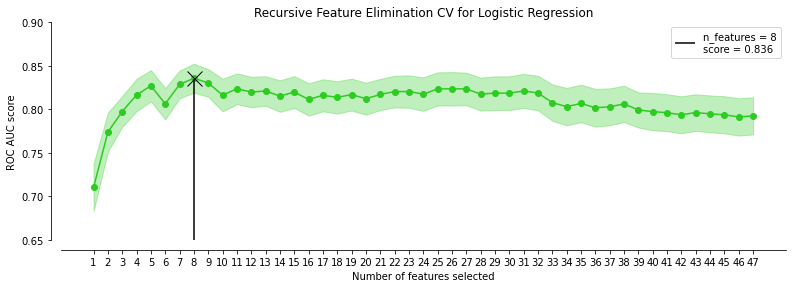

In [10]:
#plot number of features vs CV scores
n_scores = len(rfecv.cv_results_["mean_test_score"])
m = rfecv.cv_results_["mean_test_score"]
std = rfecv.cv_results_["std_test_score"]
se = std/np.sqrt(n_scores)
label = "n_features = %i\nscore = %0.3f" %(rfecv.n_features_, m.max())

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,1,1)
plt.rcParams['svg.fonttype'] = 'none'
plt.xlabel("Number of features selected")
plt.ylabel("ROC AUC score")
plt.scatter(range(1, n_scores + 1), m, color='#2ccc21')
plt.plot(range(1, n_scores + 1), m, color='#2ccc21')
plt.plot(rfecv.cv_results_["mean_test_score"].argmax()+1, m.max(), marker='x', color='k', ms=15)
plt.vlines(x=m.argmax()+1, ymin=0, ymax=m.max(), color='k', linestyle='-', label=label)
plt.fill_between(range(1, n_scores + 1), m+se, m-se, alpha=0.3, color='#2ccc21')
plt.title("Recursive Feature Elimination CV for Logistic Regression")
plt.ylim([0.65,0.90])
plt.xticks(range(1, n_scores + 1))
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(("outward", 10))
ax.spines['left'].set_position(("outward", 10))
#plt.grid()
plt.savefig('rfevc_LR.png', bbox_inches='tight')
plt.savefig('rfevc_LR.svg', bbox_inches='tight')
plt.show()

In [11]:
#descriptives when using all the tracts
mean_all = m[-1]
std_all = std[-1]
mean_all, std_all

(0.7925, 0.14642499027754027)

In [12]:
#descriptives when using the optimal tracts
mean_optimal = m[rfecv.cv_results_["mean_test_score"].argmax()]
std_optimal = std[rfecv.cv_results_["mean_test_score"].argmax()]
mean_optimal, std_optimal

(0.8358333333333331, 0.11403919620729067)

In [13]:
#list of the optimal tracts
df_fullX.index[rfecv.ranking_==1]

Index(['anterioFrontalCC', 'forcepsMinor', 'leftArc', 'leftIFOF',
       'leftMDLFang', 'leftUncinate', 'rightMDLFang', 'rightpArc'],
      dtype='object')

In [14]:
#LR without CV with all tracts
clf.fit(X,y)
y_pred=clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:, 1]
[fpr, tpr, thr] = roc_curve(y, y_pred_proba)

print("AUC is %2.3f" % auc(fpr, tpr))
print("Sensitivity is %2.3f" % recall_score(y, y_pred))
print("Specificity is %2.3f" % recall_score(np.logical_not(y), np.logical_not(y_pred)))
print(confusion_matrix(y, y_pred))

AUC is 0.862
Sensitivity is 0.778
Specificity is 0.690
[[29 13]
 [ 2  7]]


In [15]:
#LR without CV with optimal tracts
y_pred = rfecv.predict(X)
y_pred_proba = rfecv.predict_proba(X)[:, 1]
[fpr, tpr, thr] = roc_curve(y, y_pred_proba)

print("AUC is %2.3f" % auc(fpr, tpr))
print("Sensitivity is %2.3f" % recall_score(y, y_pred))
print("Specificity is %2.3f" % recall_score(np.logical_not(y), np.logical_not(y_pred)))
print(confusion_matrix(y, y_pred))

AUC is 0.902
Sensitivity is 0.889
Specificity is 0.714
[[30 12]
 [ 1  8]]
